In [1]:
import nltk
# nltk.download('wordnet')
# nltk.download('all')
# nltk.download('all-corpora')

In [2]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [3]:
text = ""
with open('text.txt', 'r') as file:
    text = file.read()
print(text)

In the distant future, Duke Leto Atreides, ruler of the planet Caladan, is assigned by the Padishah Emperor Shaddam IV to replace Baron Vladimir Harkonnen as the fiefholder of Arrakis, a harsh desert planet and the sole source of "spice", a valuable psychotropic substance that imparts heightened vitality and awareness. Spice is also key to interstellar travel, giving Spacing Guild Navigators the ability to guide starships to traverse space instantaneously and safely. Emperor Shaddam, fearful of Leto's rising power, plots for House Harkonnen to retake Arrakis, secretly aided by his Sardaukar troops, and destroy House Atreides. Leto is suspicious of the Emperor but weighs the risks against the power of controlling Arrakis and making an alliance with its mysterious natives, the Fremen.
Leto's concubine, Lady Jessica, is an acolyte of the Bene Gesseritâ€”an exclusive sisterhood whose members possess advanced physical and mental abilities. As part of a centuries-long breeding program, they 

In [4]:
tokens = word_tokenize(text)
len(tokens)

809

In [19]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

filtered = []
for word in tokens:
  if word.casefold() not in stop_words and word != ',' and word != '.' and word != "'" and word != '"' and word != "''" and word != "'s":
    filtered.append(word)

len(filtered)

444

In [6]:
# from nltk.stem import WordNetLemmatizer

# lemmatizer = WordNetLemmatizer()

# lemmatized = set([lemmatizer.lemmatize(word) for word in filtered])

# len(lemmatized)

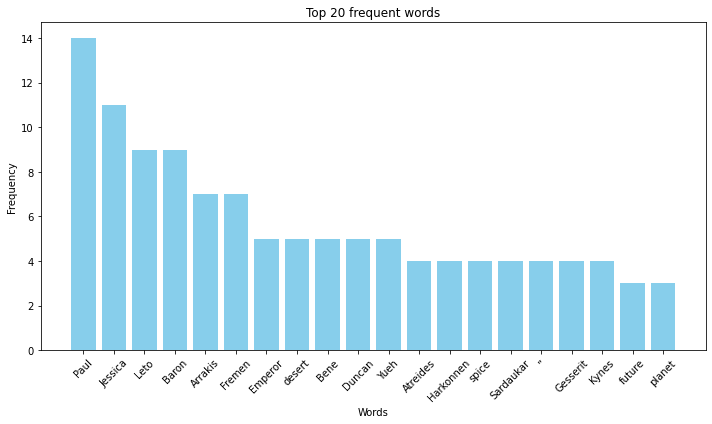

In [20]:
from nltk import FreqDist
import matplotlib.pyplot as plt

fd = FreqDist(filtered)
top20 = fd.most_common(20)

labels, values = zip(*top20)

plt.figure(figsize=(10, 6))
plt.bar(labels, values, color='skyblue')
plt.title('Top 20 frequent words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")
doc = nlp(text)
displacy.serve(doc, style="ent")

c:\Users\daara\AppData\Local\Programs\Python\Python310\lib\site-packages\spacy\displacy\__init__.py:106: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


In [8]:
displacy.serve(doc, style="dep")

c:\Users\daara\AppData\Local\Programs\Python\Python310\lib\site-packages\spacy\displacy\__init__.py:106: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


In [9]:
from spacy.tokens import Span

custom_spans = [Span(doc, 0, 4, label="CUSTOM_LABEL")]

doc.spans["custom_spans"] = custom_spans

displacy.serve(doc, style="ent", options={"ents": ["CUSTOM_LABEL"]})


Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


In [20]:
import pandas as pd
import numpy as np

df = pd.read_csv("./archive/BBC news dataset.csv")
df.head()
# df.info

,Unnamed: 0,description,tags
0,0,chelsea sack mutu chelsea have sacked adrian ...,"sports, stamford bridge, football association,..."
1,1,record fails to lift lacklustre meet yelena i...,"sports, madrid, birmingham, france, scotland, ..."
2,2,edu describes tunnel fracas arsenals edu has ...,"sports, derby, brazil, tunnel fracasedu, food,..."
3,3,ogara revels in ireland victory ireland flyha...,"sports, bbc, united kingdom, ireland, brian o'..."
4,4,unclear future for striker baros liverpool fo...,"sports, liverpool, daily sport, millennium sta..."


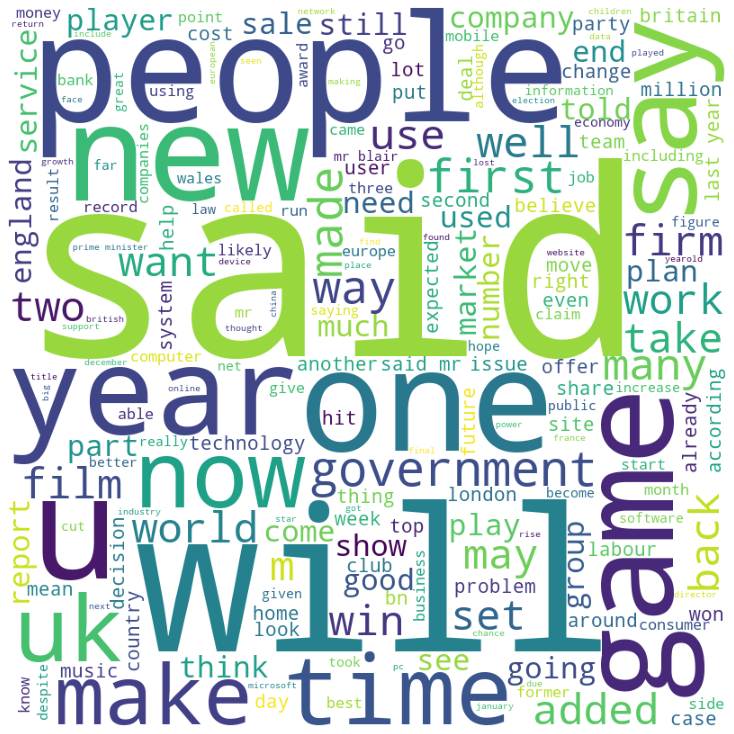

In [38]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import nltk
from PIL import Image

comments = ''

for val in df.description:
  val = str(val).lower()
  tokens = val.split()
  comments += " ".join(tokens)+" "

wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=STOPWORDS, min_font_size=10).generate(comments)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)

In [39]:
import requests

pic = np.array(Image.open(requests.get("https://www.google.com/url?sa=i&url=https%3A%2F%2Fpngfre.com%2Fcloud-png%2F&psig=AOvVaw22ICwIJtaT9a49WwegnK--&ust=1712647711259000&source=images&cd=vfe&opi=89978449&ved=0CBIQjRxqFwoTCLie5oSMsoUDFQAAAAAdAAAAABAE", stream=True).raw))

wordcloud = WordCloud(width=800, height=800, background_color='white', mask=pic, stopwords=STOPWORDS, min_font_size=10).generate(comments)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x0000023A8E5AC220>